In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic
from datetime import datetime, timedelta
import folium
from folium import Popup
from folium.plugins import HeatMap

In [88]:
# Load the datasets from JSON files
user_data = pd.read_json('user_data.json')
landlord_data = pd.read_json('landlord_data.json')
history_data = pd.read_json('history_data.json')
private_parking_data = pd.read_json('private_parking.json')
public_parking_data = pd.read_json('public_parking.json')

# Show the first few rows to verify the data
print(user_data.head())
print(landlord_data.head())
print(history_data.head())
print(private_parking_data.head())
print(public_parking_data.head())


    user_id              name       username  password license_plate_number  \
0  UID22670  Moritz Schneider  mschneider697  WUqRuupZ           FR BE 9446   
1  UID25502    Moritz Fischer    mfischer308  bQNp0ZdG           FR GV 9238   
2  UID41340          Max Koch       mkoch492  k9ZrVNFR           FR SZ 4987   
3  UID46311         Max Weber      mweber796  SfjppWXJ           FR RE 6497   
4  UID84043      Anna Richter    arichter707  e2m9BX3m           FR DB 7430   

   credits  
0   423.29  
1   101.46  
2   117.82  
3    23.49  
4   388.25  
  landlord_id           name       username  password         phone_number
0    LID23875   Lena Fischer    lfischer107  tXi756Sb  +49 (0)909 217-2503
1    LID64747    Lukas Weber      lweber957  MFAqdx0P  +49 (0)297 736-6994
2    LID21020  Max Schneider  mschneider945  MKWMTNwD  +49 (0)279 865-2721
3    LID36958   Lena Richter    lrichter246  XlfIdPug  +49 (0)722 603-7633
4    LID32743  Anna Hoffmann   ahoffmann889  IpZ245cZ  +49 (0)224 999-97

In [89]:
# Check general information for each dataframe
print(user_data.info())
print(landlord_data.info())
print(history_data.info())
print(private_parking_data.info())
print(public_parking_data.info())

# Check basic statistics for numerical columns
print(user_data.describe())
print(landlord_data.describe())
print(history_data.describe())
print(private_parking_data.describe())
print(public_parking_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               80000 non-null  object 
 1   name                  80000 non-null  object 
 2   username              80000 non-null  object 
 3   password              80000 non-null  object 
 4   license_plate_number  80000 non-null  object 
 5   credits               80000 non-null  float64
dtypes: float64(1), object(5)
memory usage: 3.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   landlord_id   5000 non-null   object
 1   name          5000 non-null   object
 2   username      5000 non-null   object
 3   password      5000 non-null   object
 4   phone_number  5000 non-null   object
dtypes: object(5)
memory us

In [90]:
# Check for missing values
print(user_data.isnull().sum())
print(landlord_data.isnull().sum())
print(history_data.isnull().sum())
print(private_parking_data.isnull().sum())
print(public_parking_data.isnull().sum())

# Check for duplicates
print(user_data.duplicated().sum())
print(landlord_data.duplicated().sum())
print(history_data.duplicated().sum())
print(private_parking_data.duplicated().sum())
print(public_parking_data.duplicated().sum())


user_id                 0
name                    0
username                0
password                0
license_plate_number    0
credits                 0
dtype: int64
landlord_id     0
name            0
username        0
password        0
phone_number    0
dtype: int64
history_id           0
rating               0
review_text          0
user_id              0
parking_id           0
parking_latitude     0
parking_longitude    0
booking_latitude     0
booking_longitude    0
distance             0
datetime             0
dtype: int64
private_id         0
name               0
address            0
latitude           0
longitude          0
price_per_hour     0
capacity           0
available_space    0
special_access     0
landlord_id        0
opening_time       0
dtype: int64
public_id          0
name               0
address            0
latitude           0
longitude          0
price_per_hour     0
capacity           0
available_space    0
opening_time       0
dtype: int64
0
0
0
0
0


In [91]:
# Merge the history data with user data to analyze booking behavior
user_history = pd.merge(history_data, user_data, on='user_id')

# Count how many times each user has booked a parking space
user_booking_counts = user_history.groupby('user_id').size().reset_index(name='booking_count')
print(user_booking_counts.head())

# Explore the average rating per user
avg_ratings_per_user = user_history.groupby('user_id')['rating'].mean().reset_index(name='average_rating')
print(avg_ratings_per_user.head())


    user_id  booking_count
0  UID10001              1
1  UID10002              3
2  UID10004              2
3  UID10008              1
4  UID10013              4
    user_id  average_rating
0  UID10001             1.0
1  UID10002             2.0
2  UID10004             0.0
3  UID10008             2.0
4  UID10013             0.0


In [92]:
# Check the number of private and public parking spaces
private_parking_count = private_parking_data.shape[0]
public_parking_count = public_parking_data.shape[0]
print(f"Private parking spaces: {private_parking_count}")
print(f"Public parking spaces: {public_parking_count}")

# Explore the total capacity of private and public parking spaces
total_private_capacity = private_parking_data['capacity'].sum()
total_public_capacity = public_parking_data['capacity'].sum()
print(f"Total private parking capacity: {total_private_capacity}")
print(f"Total public parking capacity: {total_public_capacity}")

# Explore the total available space of private and public parking spaces
total_private_available_space = private_parking_data['available_space'].sum()
total_public_available_space = public_parking_data['available_space'].sum()
print(f"Total private parking available_space: {total_private_available_space}")
print(f"Total public parking available_space: {total_public_available_space}")


Private parking spaces: 10000
Public parking spaces: 2536
Total private parking capacity: 74937
Total public parking capacity: 219176
Total private parking available_space: 29830
Total public parking available_space: 117302


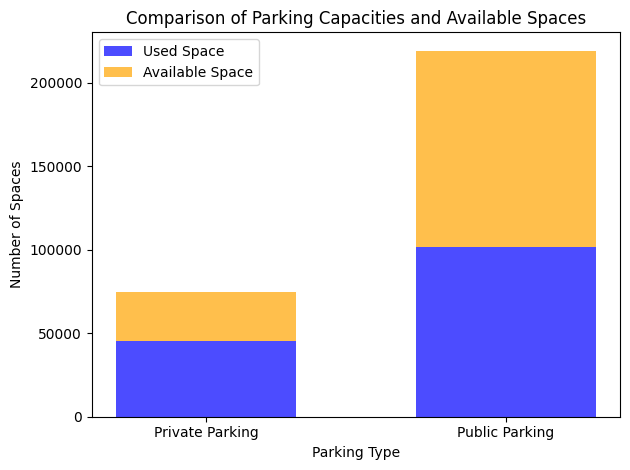

In [93]:
# Labels and values
categories = ['Private Parking', 'Public Parking']
capacity = [total_private_capacity, total_public_capacity]
available_space = [total_private_available_space, total_public_available_space]
used_space = [c - a for c, a in zip(capacity, available_space)]  # Calculate used space

# Bar positions
x = np.arange(len(categories))

# Plot stacked bars
plt.bar(x, used_space, width=0.6, label='Used Space', color='blue', alpha=0.7)
plt.bar(x, available_space, width=0.6, label='Available Space', color='orange', alpha=0.7, bottom=used_space)

# Add labels and title
plt.xlabel('Parking Type')
plt.ylabel('Number of Spaces')
plt.title('Comparison of Parking Capacities and Available Spaces')
plt.xticks(x, categories)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [94]:
# Merge the private parking data with landlord data
private_parking_landlord = pd.merge(private_parking_data, landlord_data, on='landlord_id')

# Count the number of parking spaces each landlord manages
landlord_parking_count = private_parking_landlord.groupby('landlord_id')['private_id'].count().reset_index(name='parking_count')
print(landlord_parking_count.head())

# Count the number of private parking spaces per landlord
landlord_parking_capacity = private_parking_landlord.groupby('landlord_id')['capacity'].sum().reset_index(name='total_capacity')
print(landlord_parking_capacity.head())


  landlord_id  parking_count
0    LID10014              4
1    LID10015              2
2    LID10022              3
3    LID10023              1
4    LID10040              1
  landlord_id  total_capacity
0    LID10014              29
1    LID10015              15
2    LID10022              28
3    LID10023               6
4    LID10040               7


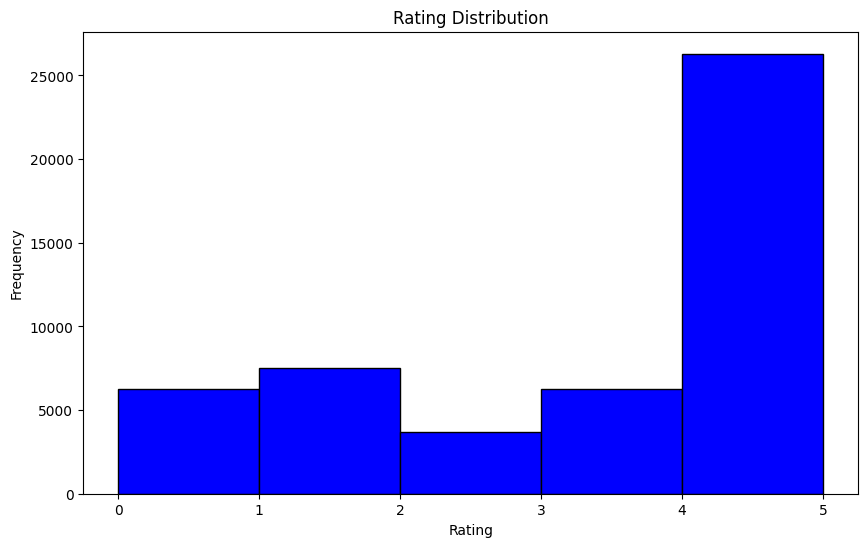

In [96]:
# Plot the rating distribution from the history data
plt.figure(figsize=(10, 6))
plt.hist(history_data['rating'], bins=5, color='blue', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [98]:
# Convert the 'datetime' column to pandas datetime format
history_data['datetime'] = pd.to_datetime(history_data['datetime'])

# Get today's date and the date 30 days ago
time_range = datetime.now() - timedelta(days=1)

# Filter the history_data to include only the rows from the last 30 days
history_data_recent = history_data[history_data['datetime'] >= time_range]

# Function to calculate the distance between two points (latitude, longitude)
def calculate_distance(row):
    parking_location = (row['parking_latitude'], row['parking_longitude'])
    booking_location = (row['booking_latitude'], row['booking_longitude'])
    return geodesic(parking_location, booking_location).km

# Recalculate the distance for each booking in the filtered data (recent 30 days)
history_data_recent['calculated_distance'] = history_data_recent.apply(calculate_distance, axis=1)

# Create a base map centered on the average booking coordinates from the recent 30 days
map_center = [history_data_recent['booking_latitude'].mean(), history_data_recent['booking_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add markers and lines to the map for the recent 30 days data
for _, row in history_data_recent.iterrows():
    parking_location = (row['parking_latitude'], row['parking_longitude'])

    booking_location = (row['booking_latitude'], row['booking_longitude'])
    time_booked = row['datetime']  
    rating = row['rating']
    review_text = row['review_text']


    popup_content = f"""
    <b>Booking Location:</b> {booking_location}<br>
    <b>Rating:</b> {rating}<br>
    <b>Review:</b> {review_text}<br>
    <b>Time Booked:</b> {time_booked}
    """
    
    # Add a marker for the parking location
    folium.Marker(
        parking_location,
        popup=Popup(f"Parking Location: {parking_location}", parse_html=True),
        icon=folium.Icon(color='blue', icon='car', prefix='fa')
    ).add_to(m)
    
    # Add a marker for the booking location
    folium.Marker(
        booking_location,
        popup=Popup(popup_content, parse_html=True),
        icon=folium.Icon(color='green', icon='home', prefix='fa')
    ).add_to(m)
    
    # Draw a line between the parking and booking locations
    folium.PolyLine(
        [parking_location, booking_location],
        color="red",
        weight=2.5,
        opacity=0.8,
        tooltip=f"Distance: {row['calculated_distance']:.2f} km"
    ).add_to(m)

# Save the map to an HTML file or display it
m.save('map_visualization_recent_days.html')
m





C:\Users\vae.tiolamon\AppData\Local\Temp\ipykernel_16464\566881509.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  history_data_recent['calculated_distance'] = history_data_recent.apply(calculate_distance, axis=1)


In [99]:
# Create a map centered around a midpoint (average latitude and longitude of parking locations)
map_center = [private_parking_data['latitude'].mean(), private_parking_data['longitude'].mean()]
parking_map = folium.Map(location=map_center, zoom_start=13)

# Combine private and public parking data for the heatmap
combined_parking_data = pd.concat([private_parking_data[['latitude', 'longitude']], 
                                   public_parking_data[['latitude', 'longitude']]], ignore_index=True)

# Add a heatmap layer
HeatMap(combined_parking_data).add_to(parking_map)

# Display the map
parking_map


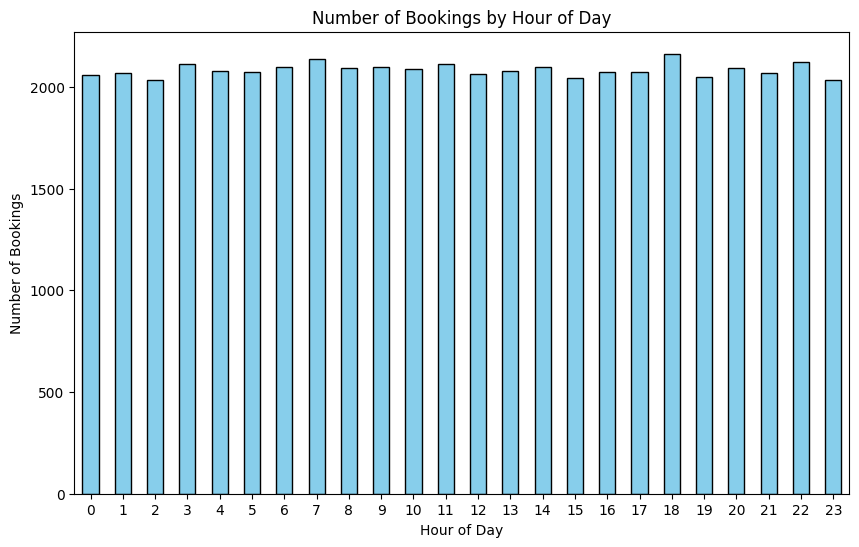

In [100]:
# Convert datetime to pandas datetime format if it's not already
history_data['datetime'] = pd.to_datetime(history_data['datetime'])

# Extract hour of booking
history_data['hour_of_day'] = history_data['datetime'].dt.hour

# Group by hour of the day and count bookings
booking_by_hour = history_data.groupby('hour_of_day').size()

# Plot the booking count by hour
plt.figure(figsize=(10, 6))
booking_by_hour.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Bookings by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.show()


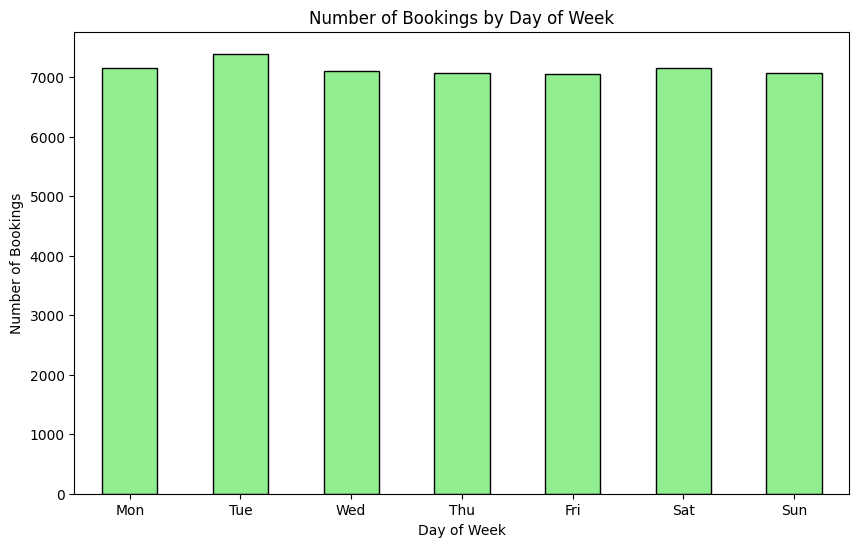

In [101]:
# Extract the day of the week from datetime (0 = Monday, 6 = Sunday)
history_data['day_of_week'] = history_data['datetime'].dt.dayofweek

# Group by day of the week and count bookings
booking_by_day = history_data.groupby('day_of_week').size()

# Plot the booking count by day of the week
plt.figure(figsize=(10, 6))
booking_by_day.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Bookings by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()


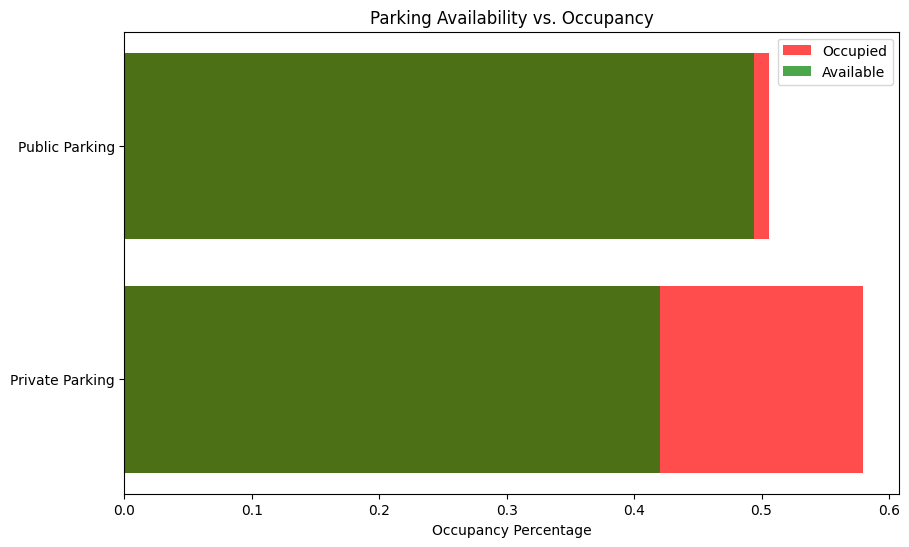

In [102]:
# Calculate occupancy percentage for private and public parking
private_parking_data['occupancy'] = 1 - (private_parking_data['available_space'] / private_parking_data['capacity'])
public_parking_data['occupancy'] = 1 - (public_parking_data['available_space'] / public_parking_data['capacity'])

# Plot stacked bar chart for occupancy
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(['Private Parking', 'Public Parking'], 
        [private_parking_data['occupancy'].mean(), public_parking_data['occupancy'].mean()],
        color='red', alpha=0.7, label='Occupied')

ax.barh(['Private Parking', 'Public Parking'], 
        [1 - private_parking_data['occupancy'].mean(), 1 - public_parking_data['occupancy'].mean()],
        color='green', alpha=0.7, label='Available')

ax.set_xlabel('Occupancy Percentage')
ax.set_title('Parking Availability vs. Occupancy')
ax.legend()
plt.show()


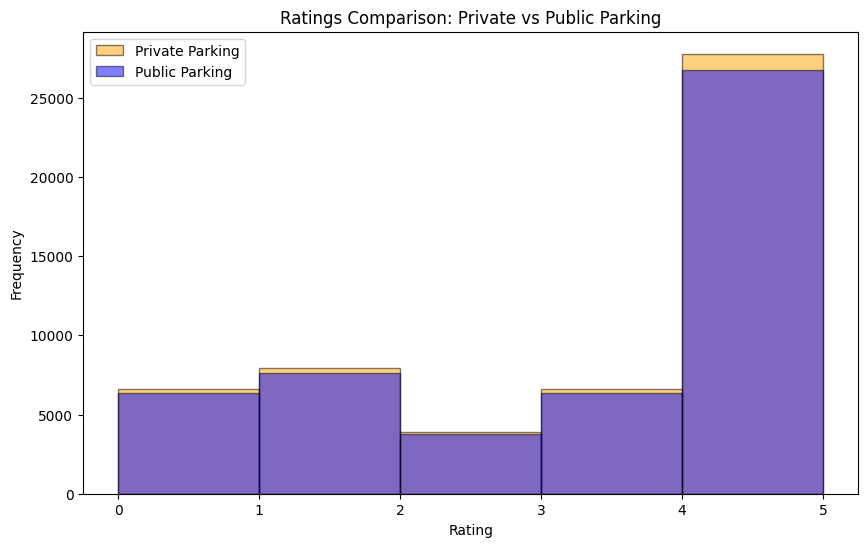

In [104]:
# Merge the history data with private and public parking data
history_private_parking = pd.merge(history_data, private_parking_data, left_on='parking_id', right_on='private_id', how='left')
history_public_parking = pd.merge(history_data, public_parking_data, left_on='parking_id', right_on='public_id', how='left')

# Plot the ratings comparison for private vs public parking
plt.figure(figsize=(10, 6))

# Plot ratings for private parking
plt.hist(history_private_parking['rating'], bins=5, alpha=0.5, label='Private Parking', color='orange', edgecolor='black')

# Plot ratings for public parking
plt.hist(history_public_parking['rating'], bins=5, alpha=0.5, label='Public Parking', color='blue', edgecolor='black')

plt.title('Ratings Comparison: Private vs Public Parking')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()
